In [ ]:
# !pip install deepface
# install deepface in colab

In [ ]:
# !ls /content/drive/MyDrive/PersianFace
# this used command in colab for show you the folder's(the model classes) 

Adel_FerdowsiPour  Behnam_Bani	      Golshifteh_Farahani  Mahnaz_Afshar      Parviz_Parastooee
Ali_Daei	   Dariush_Arjmand    Hamid_Lolaei	   Mehran_Ghafourian  Shahab_Hosseini
Ali_Khamenei	   Ebi		      Hootan_Shakiba	   Mehran_Modiri      Siamak_Ansari
Asghar_Farhadi	   Ehsan_Alikhani     Javad_Khiabani	   Mohsen_Chavoshi    Siavash_Ghomayshi
Bahare_Rahnama	   Elham_Hamidi       Javad_Razavian	   Parinaz_Izadyar    Tannaz_Tabatabaee
Bahram_Radan	   Elnaz_Shakerdoost  Leyla_Hatami	   Parsa_Pirozfar     Taraneh_Alidoosti


In [3]:
import pandas as pd
import cv2 as cv
import os
from deepface import DeepFace

24-10-13 14:43:19 - Directory /root/.deepface has been created
24-10-13 14:43:19 - Directory /root/.deepface/weights has been created


In [4]:
def generate_dataset(dataset_path: str, save_data: bool = True, dataset_name_to_save: str = "extracted_features.csv") -> pd.DataFrame | None:
    subjects_list = os.listdir(dataset_path)
    subject_feature = {}
    all_features = []

    for subject in subjects_list:
        print(f"{subject}...")
        for image in os.listdir(f"{dataset_path}/{subject}"):
            try:
              encoded_features = DeepFace.represent(img_path=os.path.join(
                  dataset_path, subject, image), model_name="ArcFace", enforce_detection=False)
              subject_feature['subject'] = subject
              for i in range(len(encoded_features[0]['embedding'])):
                  subject_feature[f'feature{i + 1}'] = encoded_features[0]['embedding'][i]
              all_features.append(subject_feature.copy())
              subject_feature = {}

            except ValueError:
              print(f"the {image} has non-english characters!")

    data = pd.DataFrame(all_features)

    if save_data:
        data.to_csv(dataset_name_to_save, index=False)
    else:
        return data

In [5]:
generate_dataset("/content/drive/MyDrive/PersianFace", True, "persian_faces.csv")

Behnam_Bani...
24-10-13 14:43:24 - arcface_weights.h5 will be downloaded to /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:00<00:00, 207MB/s]


Bahram_Radan...
Ehsan_Alikhani...
Bahare_Rahnama...
Ali_Daei...
Adel_FerdowsiPour...
Dariush_Arjmand...
Asghar_Farhadi...
Ebi...
Ali_Khamenei...
Mehran_Ghafourian...
Golshifteh_Farahani...
Hootan_Shakiba...
Mahnaz_Afshar...
Elnaz_Shakerdoost...
Javad_Razavian...
Javad_Khiabani...
Leyla_Hatami...
Elham_Hamidi...
Hamid_Lolaei...
Taraneh_Alidoosti...
Mohsen_Chavoshi...
Mehran_Modiri...
Siamak_Ansari...
Siavash_Ghomayshi...
Parviz_Parastooee...
Parinaz_Izadyar...
Tannaz_Tabatabaee...
Parsa_Pirozfar...
Shahab_Hosseini...


In [6]:
data = pd.read_csv("persian_faces.csv")
data.head()

,subject,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,Behnam_Bani,-0.147629,0.485606,-0.007253,-0.385625,0.016791,0.215721,-0.091329,-0.108491,0.051689,...,-0.696692,0.108310,0.262760,-0.529415,0.187156,-0.215679,-0.017671,0.071497,-0.296810,-0.835888
1,Behnam_Bani,0.136504,0.147031,-0.248239,-0.016051,-0.116299,0.010878,0.092545,0.064295,-0.017692,...,-0.078591,0.416189,-0.025502,-0.120170,0.130268,0.118907,-0.101997,0.253471,0.063480,0.175050
2,Behnam_Bani,-0.298764,0.810894,-0.109281,-0.554078,0.003678,0.421064,-0.228488,-0.176787,0.020008,...,-1.504049,0.205250,0.532566,-1.042849,0.508696,-0.432307,0.016840,-0.019681,-0.579187,-1.647514
3,Behnam_Bani,0.153277,0.235738,-0.033722,0.013749,0.009732,0.013022,-0.050302,0.119886,0.007534,...,-0.064046,0.544355,0.125769,-0.086220,0.305076,0.011634,-0.078758,0.148743,0.182600,0.065990
4,Behnam_Bani,0.066818,-0.066604,-0.293188,-0.025893,-0.013085,-0.284537,0.162505,0.063598,-0.264098,...,-0.562282,0.064115,-0.266362,-0.182624,0.364044,0.035889,-0.001866,0.041506,-0.283760,-0.091647


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu, sigmoid, softmax
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [8]:
enc = OneHotEncoder()

X = data.drop(['subject'], axis=1)
Y = data['subject'].to_frame()

enc.fit(Y)
subjects = enc.transform(Y).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, subjects, test_size=.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1380, 512) (346, 512) (1380, 30) (346, 30)


In [9]:
model = Sequential([
    Dense(len(x_train.columns), relu),
    Dense(256, relu),
    Dropout(.2),
    Dense(128, sigmoid),
    Dropout(.2),
    Dense(30, softmax)
])

In [10]:
model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=49)

Epoch 1/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9472 - loss: 0.1860
Epoch 2/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9497 - loss: 0.1533
Epoch 3/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9298 - loss: 0.2372
Epoch 4/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9414 - loss: 0.1851
Epoch 6/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9440 - loss: 0.1724
Epoch 7/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9526 - loss: 0.1426
Epoch 8/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9550 - loss: 0.1596
Epoch 9/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9591 - loss: 0.1281
Epoch 10/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9474 - loss: 0.1544
Epoch 11/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9437 - loss: 0.1769
Epoch 12/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9702 - loss: 0.1107
Epoch 13/49
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9553

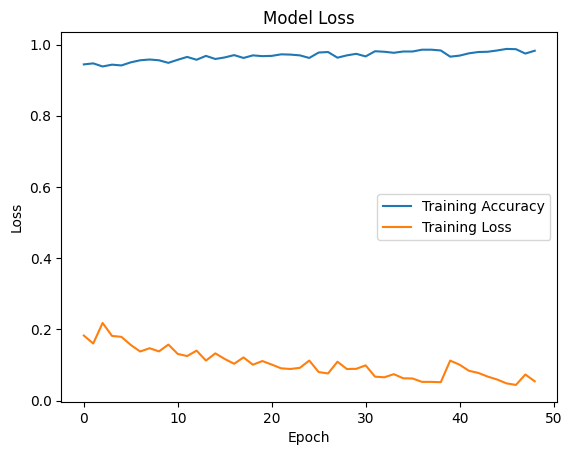

In [20]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['loss'], label="Training Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [21]:
model.evaluate(x_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8998 - loss: 0.5191  


[0.49975988268852234, 0.8988439440727234]

In [22]:
model.save("PersianFaces_49ep.keras")

In [24]:
adel_ferdosipour = cv.imread("/content/drive/MyDrive/PersianFace/Adel_FerdowsiPour/Adel_FerdowsiPour_1.jpg")

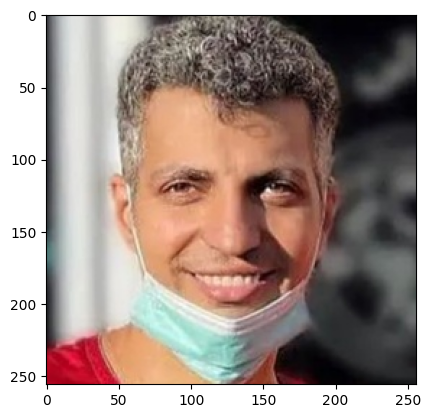

In [25]:
plt.imshow(cv.cvtColor(adel_ferdosipour, cv.COLOR_BGR2RGB))
plt.show()

In [26]:
encoded_adel = DeepFace.represent(img_path="/content/drive/MyDrive/PersianFace/Adel_FerdowsiPour/Adel_FerdowsiPour_1.jpg", model_name="ArcFace")

In [27]:
adel_features = np.asarray(encoded_adel[0]["embedding"])
adel_features = adel_features.reshape(-1, 512)
print(adel_features.shape)

(1, 512)


In [28]:
prediction = np.argmax(model.predict(adel_features))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0


In [30]:
subjects = [subject for subject in os.listdir("/content/drive/MyDrive/PersianFace")]
subjects = sorted(subjects)
subjects

['Adel_FerdowsiPour',
 'Ali_Daei',
 'Ali_Khamenei',
 'Asghar_Farhadi',
 'Bahare_Rahnama',
 'Bahram_Radan',
 'Behnam_Bani',
 'Dariush_Arjmand',
 'Ebi',
 'Ehsan_Alikhani',
 'Elham_Hamidi',
 'Elnaz_Shakerdoost',
 'Golshifteh_Farahani',
 'Hamid_Lolaei',
 'Hootan_Shakiba',
 'Javad_Khiabani',
 'Javad_Razavian',
 'Leyla_Hatami',
 'Mahnaz_Afshar',
 'Mehran_Ghafourian',
 'Mehran_Modiri',
 'Mohsen_Chavoshi',
 'Parinaz_Izadyar',
 'Parsa_Pirozfar',
 'Parviz_Parastooee',
 'Shahab_Hosseini',
 'Siamak_Ansari',
 'Siavash_Ghomayshi',
 'Tannaz_Tabatabaee',
 'Taraneh_Alidoosti']